#M4-Group-Assignment-1


Created by Benjamin, Camilla and Tobias

##Boston Housing Price Prediction With PyTorch Neural Network


###Task
Build, train, and evaluate neural network models using PyTorch to predict Boston housing prices.

In [2]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns
from tqdm import tqdm_notebook

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'y']

In [4]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Benj3037/M3-Group-Assignment-1/main/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##Basic EDA

In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()  #Counting the no.of null respect to the features or columns

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
y          0
dtype: int64

###Bivariate analysis


In [9]:
corr = df.corr()

<Axes: >

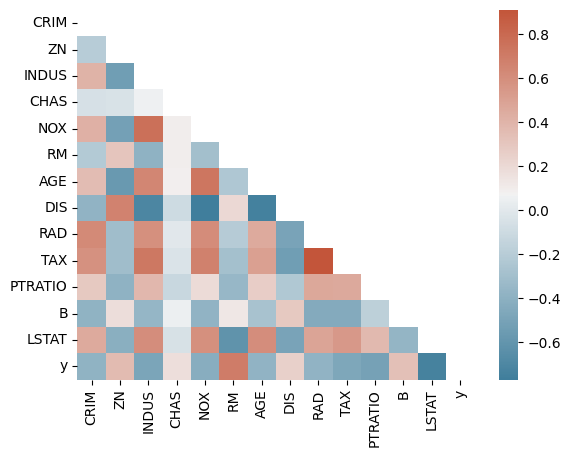

In [10]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask=mask, cmap=cmap)

## Preprocessing

We preprocess the data by standardising it and then we split into a train and test set using standard settings.

In [11]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler # Importing the MinMaxScaler class from the preprocessing module of the sklearn library.

# Scaling the features in the dataset X using the fit_transform method of the MinMaxScaler object.
# This method computes the minimum and maximum values of the features in X and then scales the data accordingly.
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

df_s = pd.DataFrame(df_scaled, columns=df.columns)


In [12]:
# Split the dataset
X = df_s.drop('y', axis=1) # X everything execpt price
y = df_s['y'] # price

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Defining neural network architecture

In [14]:
import torch

# Convert the pandas Series to a PyTorch tensor
tensor_data_X_train = torch.tensor(X_train.values, dtype=torch.float32)
tensor_data_y_train = torch.tensor(y_train.values, dtype=torch.float32)

tensor_data_X_test = torch.tensor(X_test.values, dtype=torch.float32)
tensor_data_y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [15]:
tensor_data_X_train[0]

tensor([0.1688, 0.0000, 0.6466, 0.0000, 0.4712, 0.3340, 0.9722, 0.0883, 1.0000,
        0.9141, 0.8085, 0.8804, 0.6396])

In [16]:
tensor_data_X_train[0].reshape(-1)

tensor([0.1688, 0.0000, 0.6466, 0.0000, 0.4712, 0.3340, 0.9722, 0.0883, 1.0000,
        0.9141, 0.8085, 0.8804, 0.6396])

In [17]:
tensor_data_X_train.shape

torch.Size([404, 13])

In [18]:
tensor_data_X_train.shape

torch.Size([404, 13])

In [19]:
tensor_data_X_train.reshape(-1, 1)

tensor([[0.1688],
        [0.0000],
        [0.6466],
        ...,
        [0.8830],
        [0.1777],
        [0.2456]])

In [20]:
# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
#def nn(x, w):
#    """Output function y = x * w"""
 #   return x * w

Stochastic Gradient Descent (SGD)

In [21]:
# Initializing Hyperparameters
epochs = 3
learning_rate = 2


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net1 = torch.nn.Sequential(torch.nn.Linear(13,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),
                                 torch.nn.Linear(39,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(39,1), # use the 3 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net1.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X_train.size(0)):

      # 2. Forward Pass
      output = model_net1(tensor_data_X_train[i].reshape(-1))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_y_train[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      #w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      #print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X_train.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-21-54e1185443ef>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.2258
--------------------------------------------------


Epoch 2 Average Loss: 0.1993
--------------------------------------------------


Epoch 3 Average Loss: 0.1993
--------------------------------------------------



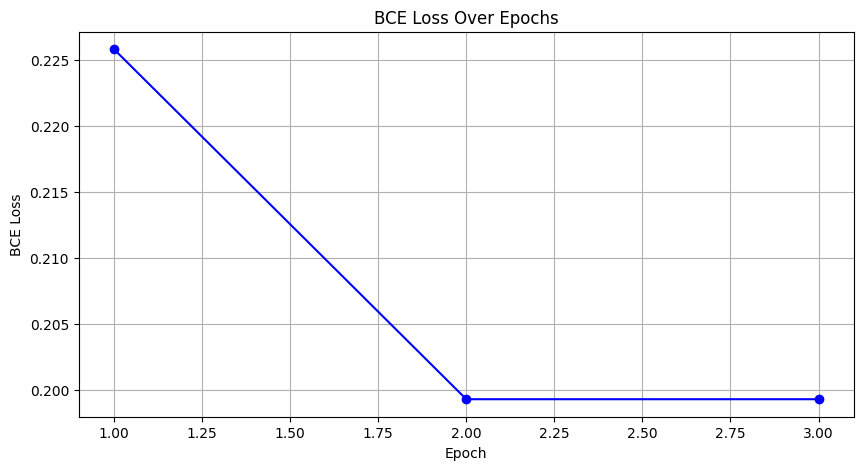

In [22]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

In [25]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 1


# Initializing Parameters
w = 100

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net2 = torch.nn.Sequential(torch.nn.Linear(13,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),
                                 torch.nn.Linear(39,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,1), # use the 3 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net2.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X_train.size(0)):

      # 2. Forward Pass
      output = model_net2(tensor_data_X_train[i].reshape(-1))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_y_train[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      #w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      #print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X_train.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-25-e838e7929ef2>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.2373
--------------------------------------------------


Epoch 2 Average Loss: 0.1993
--------------------------------------------------


Epoch 3 Average Loss: 0.1993
--------------------------------------------------


Epoch 4 Average Loss: 0.1993
--------------------------------------------------


Epoch 5 Average Loss: 0.1993
--------------------------------------------------


Epoch 6 Average Loss: 0.1993
--------------------------------------------------


Epoch 7 Average Loss: 0.1993
--------------------------------------------------


Epoch 8 Average Loss: 0.1993
--------------------------------------------------


Epoch 9 Average Loss: 0.1993
--------------------------------------------------


Epoch 10 Average Loss: 0.1993
--------------------------------------------------



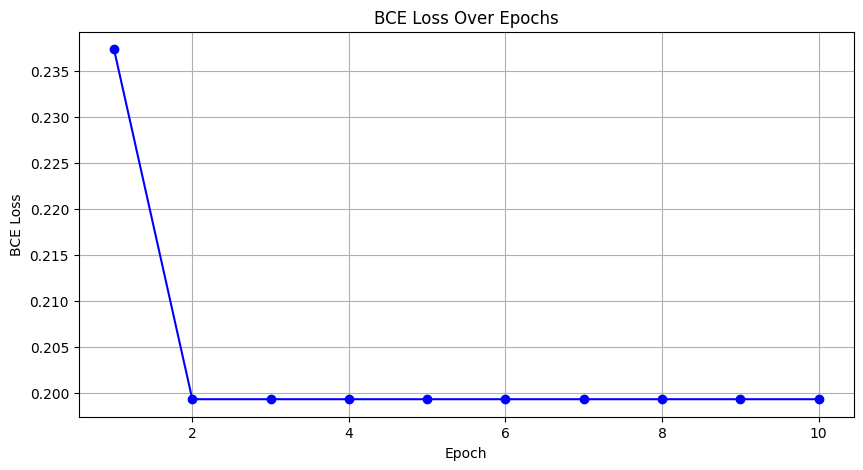

In [26]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

Mini-batch gradient descent

In [30]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 1


# Initializing Parameters
w = 100

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(13,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),
                                 torch.nn.Linear(39,39), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,1), # use the 3 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_net3(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-30-281168282079>:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Epoch 1 Average Loss: 0.2277
--------------------------------------------------


Epoch 2 Average Loss: 0.2020
--------------------------------------------------


Epoch 3 Average Loss: 0.2020
--------------------------------------------------


Epoch 4 Average Loss: 0.2020
--------------------------------------------------


Epoch 5 Average Loss: 0.2020
--------------------------------------------------


Epoch 6 Average Loss: 0.2020
--------------------------------------------------


Epoch 7 Average Loss: 0.2020
--------------------------------------------------


Epoch 8 Average Loss: 0.2020
--------------------------------------------------


Epoch 9 Average Loss: 0.2020
--------------------------------------------------


Epoch 10 Average Loss: 0.2020
--------------------------------------------------



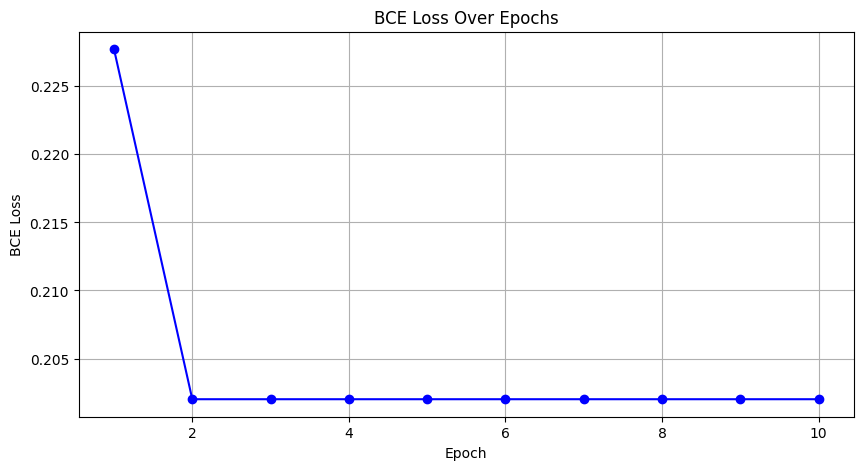

In [31]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

Stochastic Gradient Descent (SGD) with Identity


In [39]:
# Initializing Hyperparameters
epochs = 5
learning_rate = 0.01


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net4 = torch.nn.Sequential(torch.nn.Linear(13,40), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),
                                 torch.nn.Linear(40,40), # 1 input, 3 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(40,1), # use the 3 as an input and map 1 output
                                 torch.nn.Identity(),
                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_net4(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-39-995e64c7d93f>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Epoch 1 Average Loss: 0.1439
--------------------------------------------------


Epoch 2 Average Loss: 0.0613
--------------------------------------------------


Epoch 3 Average Loss: 0.0506
--------------------------------------------------


Epoch 4 Average Loss: 0.0495
--------------------------------------------------


Epoch 5 Average Loss: 0.0485
--------------------------------------------------



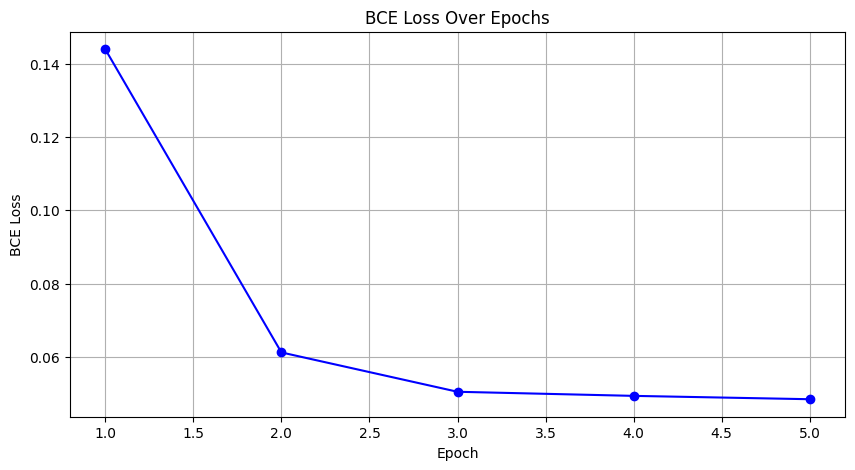

In [40]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

Stochastic Gradient Descent (SGD) with Identity


In [47]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.01


# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net5 = torch.nn.Sequential(torch.nn.Linear(13,25), # 13 input, 25 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),
                                 torch.nn.Linear(25,25), # 25 input, 25 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(25,1), # use the 25 as an input and map 1 output
                                 torch.nn.Identity(),
                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net5.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_net5(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-47-300fb5dbc4bf>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.0783
--------------------------------------------------


Epoch 2 Average Loss: 0.0510
--------------------------------------------------


Epoch 3 Average Loss: 0.0485
--------------------------------------------------


Epoch 4 Average Loss: 0.0480
--------------------------------------------------


Epoch 5 Average Loss: 0.0476
--------------------------------------------------


Epoch 6 Average Loss: 0.0468
--------------------------------------------------


Epoch 7 Average Loss: 0.0462
--------------------------------------------------


Epoch 8 Average Loss: 0.0466
--------------------------------------------------


Epoch 9 Average Loss: 0.0469
--------------------------------------------------


Epoch 10 Average Loss: 0.0456
--------------------------------------------------



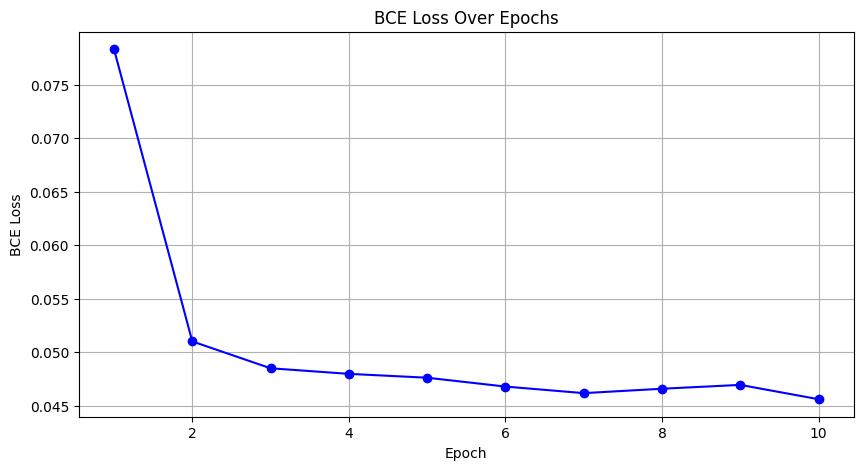

In [48]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

### Evaulation

After conducting 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).

It has been evaulated that the best variations of an architecture is model_net5 consists of:

- Hyperparamters that consist of 10 epochs and learning_rate of 0.01.
- Parameter with a weight of 50
- 2 hidden layers consisting of: Linear(13,25) + ReLU + Dropout(0.33) and Linear(25,25) + ReLU + Dropout(0.33)
- Output layer consisting of Linear(25,1) and Identity() for a regression problem
- Using Stochastic Gradient Descent as our Optimizer
- Batch size consist of 13

The average loss for epoch 10 showing a loss of 0.0456 which is the best outcome.